In [380]:
import pandas as pd
import numpy as np
import math
import json
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
import matplotlib.pyplot as mp
import warnings
import seaborn as sns
import progressbar

%matplotlib inline

warnings.filterwarnings(action='once')

In [381]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
#profile = pd.read_json('data/profile.json', orient='records', lines=True)
profile = pd.read_csv('new_profile.csv')
transcript = pd.read_csv('transcript.csv')

In [382]:
portfolio.head()

channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [web, email, mobile]           5         7   
4                  [web, email]          20        10   

                                 id     offer_type  reward  
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo      10  
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo      10  
2  3f207df678b143eea3cee63160fa8bed  informational       0  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo       5  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount       5

In [383]:
profile.head()

age gender    income  person_id  year_of_member  month_of_member  \
0  55.0      F  112000.0        398            2017                7   
1  75.0      F  100000.0       7996            2017                5   
2  68.0      M   70000.0      15043            2018                4   
3  65.0      M   53000.0       3728            2018                2   
4  58.0      M   51000.0       3059            2017               11   

   day_of_member  
0             15  
1              9  
2             26  
3              9  
4             11

In [384]:
transcript.head()

event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value      type  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}  offer id   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}  offer id   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}  offer id   
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}  offer id   
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}  offer id   

                                amt  person_id  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9       7996  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7      10735  
2  2906b810c7d4411798c6938adc9daaa5      15043  
3  fafdcd668e3743c1bb461111dcafc2a4       9524  
4  4d5c57ea9a6940dd891ad53e9dbe8da0       6939

#### Now looking at our demographic distributions again





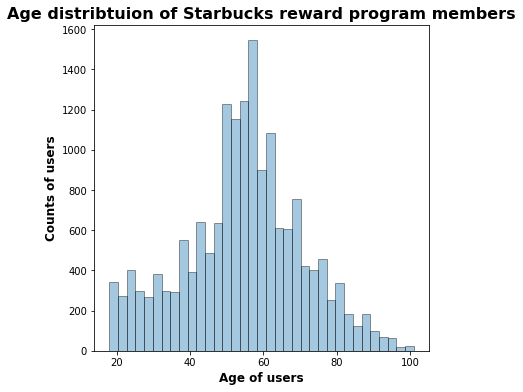

In [385]:
# Age distibution of users--
fig, ax = mp.subplots(figsize=(6,6));
sns.distplot(profile['age'], hist = True, kde = False, bins = 35,
                 hist_kws={'edgecolor':'black'},
                 label = 'Age distribution')
ax.set_title("Age distribtuion of Starbucks reward program members", fontsize=16, weight = 'bold')
ax.set_xlabel("Age of users", fontsize=12, weight = 'bold');
ax.set_ylabel("Counts of users", fontsize=12, weight = 'bold');

Now our distribution looks more and more uniform

##### Gender distribution

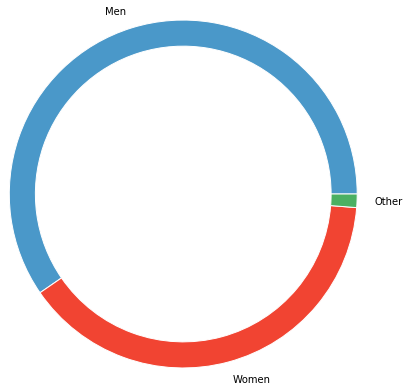

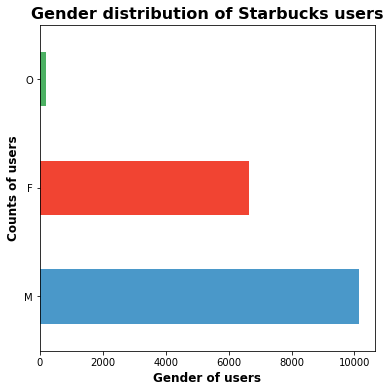

In [386]:
group_names=['Men', 'Women', 'Other']
group_size=profile['gender'].value_counts()

# Create colors
a, b, c=[mp.cm.Blues, mp.cm.Reds, mp.cm.Greens]
 
# First Ring 
fig, ax = mp.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.0, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
mp.setp( mypie, width=0.3, edgecolor='white')


fig, ax = mp.subplots(figsize=(6,6));
profile['gender'].value_counts().plot(kind='barh', ax=ax, color=[a(0.6), b(0.6), c(0.6)]);
ax.set_title("Gender distribution of Starbucks users", fontsize=16, weight = 'bold')
ax.set_xlabel("Gender of users", fontsize=12,weight = 'bold');
ax.set_ylabel("Counts of users", fontsize=12,weight = 'bold');

##### Income distribution

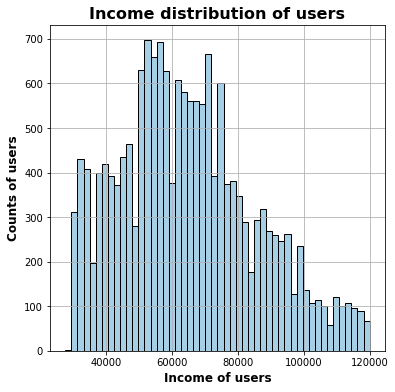

In [387]:
# Original distribution of income---we couldnt use sns as there are NAN values. We would have to first remove NAN values to use sns format. So here we use the matplotlib standard historgram
fig, ax = mp.subplots(figsize=(6,6));
profile['income'].hist(bins=50, ax=ax,  color = a(0.35), edgecolor='black');
ax.set_title("Income distribution of users", fontsize=16, weight = 'bold')
ax.set_xlabel("Income of users", fontsize=12, weight = 'bold');
ax.set_ylabel("Counts of users", fontsize=12, weight = 'bold');

In [388]:
## to extract keys and values from the dictionary, we can use the lambda function as shown in the reference below

#https://stackoverflow.com/questions/46405974/extract-values-from-dictionaries-in-dataframe-columns
    
#transcript['type'] = transcript['value'].apply(lambda x : list(x.keys())[0])


#transcript['amt'] = transcript['value'].apply(lambda x : list(x.values())[0])    

#after applying these transformation lets look at transcript
transcript.head()

event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value      type  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}  offer id   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}  offer id   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}  offer id   
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}  offer id   
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}  offer id   

                                amt  person_id  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9       7996  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7      10735  
2  2906b810c7d4411798c6938adc9daaa5      15043  
3  fafdcd668e3743c1bb461111dcafc2a4       9524  
4  4d5c57ea9a6940dd891ad53e9dbe8da0       6939

In [389]:
def encode (df1, df2, colname1, colname2, colnameout):
    '''
    DESCRIPTION:
    This functions, encode the hash values in the data set and column gives into thier encoded values
    
    INPUTS:
    data frames which has hashvalues
    col names which has hash values
    
    OUTPUTS: 
    encoded values in the new colname that is output
    
    '''
    
    
    encod = LabelEncoder()
    df1[colnameout] = encod.fit_transform(df1[[colname1]])
    df2[colnameout] = encod.transform(df2[[colname2]])
           
    
    return df1, df2, encod

In [390]:
transcript.head()

event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value      type  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}  offer id   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}  offer id   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}  offer id   
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}  offer id   
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}  offer id   

                                amt  person_id  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9       7996  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7      10735  
2  2906b810c7d4411798c6938adc9daaa5      15043  
3  fafdcd668e3743c1bb461111dcafc2a4       9524  
4  4d5c57ea9a6940dd891ad53e9dbe8da0       6939

In [391]:
###Transcript data with offers only---| is the OR operator https://stackoverflow.com/questions/5988665/pipe-character-in-python

trans_off = transcript[(transcript['type']=='offer id') | (transcript['type']=='offer_id')]
trans_off.drop(['value', 'person'], axis=1, inplace = True)

trans_off.head()


C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


event  time      type                               amt  person_id
0  offer received     0  offer id  9b98b8c7a33c4b65b9aebfe6a799e6d9       7996
1  offer received     0  offer id  0b1e1539f2cc45b7b9fa7c272da2e1d7      10735
2  offer received     0  offer id  2906b810c7d4411798c6938adc9daaa5      15043
3  offer received     0  offer id  fafdcd668e3743c1bb461111dcafc2a4       9524
4  offer received     0  offer id  4d5c57ea9a6940dd891ad53e9dbe8da0       6939

In [392]:
trans_trans = transcript[(transcript['type']=='amount')];
trans_trans.drop(['value', 'person'], axis=1, inplace = True)
trans_trans.rename(index = str, columns = {"time":"time_spent", "amt":"amt_spent"}, inplace = True)
trans_trans.head()


C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


event  time_spent    type           amt_spent  person_id
12654  transaction           0  amount  0.8300000000000001        169
12657  transaction           0  amount               34.56      10701
12659  transaction           0  amount               13.23       5627
12670  transaction           0  amount               19.51      11984
12671  transaction           0  amount               18.97      16908

In [393]:
portfolio, trans_off, encod = encode(portfolio, trans_off, "id", "amt", 'offer_id')

C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [394]:
trans_off.head()

event  time      type                               amt  \
0  offer received     0  offer id  9b98b8c7a33c4b65b9aebfe6a799e6d9   
1  offer received     0  offer id  0b1e1539f2cc45b7b9fa7c272da2e1d7   
2  offer received     0  offer id  2906b810c7d4411798c6938adc9daaa5   
3  offer received     0  offer id  fafdcd668e3743c1bb461111dcafc2a4   
4  offer received     0  offer id  4d5c57ea9a6940dd891ad53e9dbe8da0   

   person_id  offer_id  
0       7996         6  
1      10735         0  
2      15043         2  
3       9524         9  
4       6939         4

In [395]:
portfolio.head()

channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [web, email, mobile]           5         7   
4                  [web, email]          20        10   

                                 id     offer_type  reward  offer_id  
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo      10         7  
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo      10         4  
2  3f207df678b143eea3cee63160fa8bed  informational       0         3  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo       5         6  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount       5         0

In [396]:
portfolio.drop(['id'], axis=1, inplace=True)
trans_off.drop(['amt'], axis=1, inplace=True)
portfolio.head()

C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


channels  difficulty  duration     offer_type  reward  \
0       [email, mobile, social]          10         7           bogo      10   
1  [web, email, mobile, social]          10         5           bogo      10   
2          [web, email, mobile]           0         4  informational       0   
3          [web, email, mobile]           5         7           bogo       5   
4                  [web, email]          20        10       discount       5   

   offer_id  
0         7  
1         4  
2         3  
3         6  
4         0

In [397]:
chan = []
for i in portfolio['channels']:
    for j in i:
        if j not in chan:
            chan.append(j)
            
for j in chan:
    portfolio[j] = portfolio['channels'].apply(lambda x:1 if j in x else 0)
    
 

#we also drop the channels column

portfolio.drop(['channels'], axis = 1, inplace = True)

portfolio.head()

difficulty  duration     offer_type  reward  offer_id  email  mobile  \
0          10         7           bogo      10         7      1       1   
1          10         5           bogo      10         4      1       1   
2           0         4  informational       0         3      1       1   
3           5         7           bogo       5         6      1       1   
4          20        10       discount       5         0      1       0   

   social  web  
0       1    0  
1       1    1  
2       0    1  
3       0    1  
4       0    1

In [398]:
trans_off = pd.merge(trans_off, portfolio, how = 'left', on = 'offer_id')
trans_off.head()

event  time      type  person_id  offer_id  difficulty  duration  \
0  offer received     0  offer id       7996         6           5         7   
1  offer received     0  offer id      10735         0          20        10   
2  offer received     0  offer id      15043         2          10         7   
3  offer received     0  offer id       9524         9          10        10   
4  offer received     0  offer id       6939         4          10         5   

  offer_type  reward  email  mobile  social  web  
0       bogo       5      1       1       0    1  
1   discount       5      1       0       0    1  
2   discount       2      1       1       0    1  
3   discount       2      1       1       1    1  
4       bogo      10      1       1       1    1

##### The time column in trans_off is the time when the last event occuered, so if the event say offer_recieved, then time column is the time at which it is recieved, and if it says offer completed, then time column says the time at which it was compelted.

###### Now we will basically break down trans_offer into offer_Received, offer_viewed, and offer_completed and get their times. 

In [399]:
off_rec = trans_off[trans_off['event'] =='offer received']
off_rec.rename(index = str, columns={"time": "time_rec"}, inplace = True)
off_rec.drop(['event'], inplace = True, axis = 1)

##Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
off_rec.head()

C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


time_rec      type  person_id  offer_id  difficulty  duration offer_type  \
0         0  offer id       7996         6           5         7       bogo   
1         0  offer id      10735         0          20        10   discount   
2         0  offer id      15043         2          10         7   discount   
3         0  offer id       9524         9          10        10   discount   
4         0  offer id       6939         4          10         5       bogo   

   reward  email  mobile  social  web  
0       5      1       1       0    1  
1       5      1       0       0    1  
2       2      1       1       0    1  
3       2      1       1       1    1  
4      10      1       1       1    1

##### Now we do similar for offer completed, and offer viewed

In [400]:
off_vw = trans_off[trans_off['event'] =='offer viewed']
off_vw.rename(index = str, columns={"time": "time_vw"}, inplace = True)
off_vw.drop(['event'], inplace = True, axis = 1)

##Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
off_vw.head()

C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


time_vw      type  person_id  offer_id  difficulty  duration  \
12650        0  offer id       3728         8           5         5   
12651        0  offer id      13994         5           0         3   
12652        0  offer id       1051         4          10         5   
12653        0  offer id        169         7          10         7   
12654        0  offer id      12743         5           0         3   

          offer_type  reward  email  mobile  social  web  
12650           bogo       5      1       1       1    1  
12651  informational       0      1       1       1    0  
12652           bogo      10      1       1       1    1  
12653           bogo      10      1       1       1    0  
12654  informational       0      1       1       1    0

In [401]:
off_comp = trans_off[trans_off['event'] =='offer completed']
off_comp.rename(index = str, columns={"time": "time_comp"}, inplace = True)
off_comp.drop(['event'], inplace = True, axis = 1)

##Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
off_comp.head()

C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


time_comp      type  person_id  offer_id  difficulty  duration  \
12656          0  offer_id      10701         2          10         7   
12667          0  offer_id      16908         9          10        10   
12673          0  offer_id       6534         6           5         7   
12683          0  offer_id       6862         7          10         7   
12687          0  offer_id       9576         4          10         5   

      offer_type  reward  email  mobile  social  web  
12656   discount       2      1       1       0    1  
12667   discount       2      1       1       1    1  
12673       bogo       5      1       1       0    1  
12683       bogo      10      1       1       1    0  
12687       bogo      10      1       1       1    1

In [402]:
drop_cols = ['type', 'offer_type','difficulty', 'duration', 'reward', 'email', 'mobile', 'social', 'web']


off_vw.drop(drop_cols, axis =1, inplace = True)

off_vw.head()

C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


time_vw  person_id  offer_id
12650        0       3728         8
12651        0      13994         5
12652        0       1051         4
12653        0        169         7
12654        0      12743         5

In [403]:
off_comp.drop(drop_cols, axis = 1, inplace = True)
off_comp.head()

C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


time_comp  person_id  offer_id
12656          0      10701         2
12667          0      16908         9
12673          0       6534         6
12683          0       6862         7
12687          0       9576         4

In [404]:
Offers = pd.merge(off_rec, off_vw, on=['person_id', 'offer_id'], how = 'left')
Offers = pd.merge(Offers, off_comp, on = ['person_id', 'offer_id'], how = 'left')


Offers.shape

(115609, 14)

In [405]:
Offers.head()

time_rec      type  person_id  offer_id  difficulty  duration offer_type  \
0         0  offer id       7996         6           5         7       bogo   
1         0  offer id      10735         0          20        10   discount   
2         0  offer id      10735         0          20        10   discount   
3         0  offer id      15043         2          10         7   discount   
4         0  offer id       9524         9          10        10   discount   

   reward  email  mobile  social  web  time_vw  time_comp  
0       5      1       1       0    1      6.0      132.0  
1       5      1       0       0    1      6.0        NaN  
2       5      1       0       0    1    624.0        NaN  
3       2      1       1       0    1     18.0        NaN  
4       2      1       1       1    1     12.0        NaN

In [406]:
Offers['time_exp'] = Offers['time_rec'] + Offers['duration']

Offers= Offers[((Offers['time_vw'] >= Offers['time_rec'])&(Offers['time_comp'] >= Offers['time_rec']))\
              |((Offers['time_vw']>= Offers['time_rec'])&(Offers['time_comp'].isnull()))\
              |((Offers['time_vw'].isnull())&(Offers['time_comp'].isnull()))]


Offers.head()

time_rec      type  person_id  offer_id  difficulty  duration offer_type  \
0         0  offer id       7996         6           5         7       bogo   
1         0  offer id      10735         0          20        10   discount   
2         0  offer id      10735         0          20        10   discount   
3         0  offer id      15043         2          10         7   discount   
4         0  offer id       9524         9          10        10   discount   

   reward  email  mobile  social  web  time_vw  time_comp  time_exp  
0       5      1       1       0    1      6.0      132.0         7  
1       5      1       0       0    1      6.0        NaN        10  
2       5      1       0       0    1    624.0        NaN        10  
3       2      1       1       0    1     18.0        NaN         7  
4       2      1       1       1    1     12.0        NaN        10

In [407]:
def succ_offer(df):
    if ((df['time_rec']<= df['time_vw'])&\
        (df['time_vw']<= df['time_comp'])&\
        (df['time_comp']<=df['time_exp'])):
        return 1
    else:
        return 0
    
    
def trid_offer(df):
    if ((df['time_rec']<= df['time_vw'])&\
       (df['time_vw']<= df['time_exp'])&\
       (math.isnan(df['time_comp']))|\
       (df['time_rec']<= df['time_vw'])&\
       (df['time_exp']<df['time_comp'])&\
       (df['time_vw']<=df['time_exp'])):
        return  1
    else:
        return 0
    
    
def failed_offer(df):
    if((df['Success']==1)|(df['tried']==1)):
        return 0
    else:
        return 1


In [408]:
Offers['Success'] = Offers.apply(succ_offer, axis = 1)
Offers['tried'] = Offers.apply(trid_offer, axis = 1)
Offers['failed']= Offers.apply(failed_offer, axis =1)

##### Now we also want to check if the same users are recieving the same offer more than once at the same time, i.e. same unit of time


In [409]:
off_rec[off_rec.duplicated(subset=['time_rec', 'person_id', 'offer_id'])]


Empty DataFrame
Columns: [time_rec, type, person_id, offer_id, difficulty, duration, offer_type, reward, email, mobile, social, web]
Index: []

In [410]:
Offers[Offers.duplicated(subset=['time_rec', 'person_id', 'offer_id'])]

time_rec      type  person_id  offer_id  difficulty  duration  \
2              0  offer id      10735         0          20        10   
5              0  offer id       9524         9          10        10   
8              0  offer id       3728         8           5         5   
9              0  offer id       3728         8           5         5   
10             0  offer id       3728         8           5         5   
12             0  offer id      13108         1           7         7   
19             0  offer id       4996         7          10         7   
21             0  offer id      12984         3           0         4   
23             0  offer id      14192         0          20        10   
24             0  offer id      14192         0          20        10   
25             0  offer id      14192         0          20        10   
27             0  offer id      16458         9          10        10   
28             0  offer id      16458         9          10        10   
29             0  offer id      16458         9          10        10   
31             0  offer id      13880         0          20        10   
32             0  offer id      13880         0          20        10   
33             0  offer id      13880         0          20        10   
56             0  offer id       3340         6           5         7   
57             0  offer id       3340         6           5         7   
58             0  offer id       3340         6           5         7   
64             0  offer id      14118         8           5         5   
65             0  offer id      14118         8           5         5   
66             0  offer id      14118         8           5         5   
69             0  offer id       3024         1           7         7   
70             0  offer id       3024         1           7         7   
71             0  offer id       3024         1           7         7   
75             0  offer id       3834         4          10         5   
76             0  offer id       3834         4          10         5   
77             0  offer id       3834         4          10         5   
79             0  offer id       8531         8           5         5   
...          ...       ...        ...       ...         ...       ...   
111301       576  offer id      16123         2          10         7   
111419       576  offer id       1729         7          10         7   
111478       576  offer id       3515         6           5         7   
111708       576  offer id      12060         1           7         7   
111762       576  offer id       3942         8           5         5   
111892       576  offer id       7145         6           5         7   
111961       576  offer id        800         0          20        10   
112074       576  offer id       4416         2          10         7   
112084       576  offer id       6845         8           5         5   
112306       576  offer id       8398         8           5         5   
112484       576  offer id       6005         9          10        10   
112556       576  offer id      15737         2          10         7   
112602       576  offer id      13452         1           7         7   
112693       576  offer id        746         9          10        10   
112774       576  offer id       1562         7          10         7   
112830       576  offer id       1881         0          20        10   
112837       576  offer id      12570         8           5         5   
113010       576  offer id      12216         2          10         7   
113452       576  offer id       7269         2          10         7   
113588       576  offer id       1789         0          20        10   
114048       576  offer id      16424         0          20        10   
114279       576  offer id       6864         7          10         7   
114293       576  offer id       1788         0          20       

In [411]:
Offers.drop_duplicates(subset=['time_rec', 'person_id', 'offer_id'], keep = 'first', inplace = True)

In [412]:
Offers.shape

(68995, 18)

In [413]:
off_rec.shape

(76277, 12)

In [414]:
rec_trid_suc = Offers[(Offers['Success']==1)|(Offers['tried']==1)]
rec_trid_suc.head()


time_rec      type  person_id  offer_id  difficulty  duration offer_type  \
0          0  offer id       7996         6           5         7       bogo   
1          0  offer id      10735         0          20        10   discount   
7          0  offer id       3728         8           5         5       bogo   
39         0  offer id       1051         4          10         5       bogo   
44         0  offer id        169         7          10         7       bogo   

    reward  email  mobile  social  web  time_vw  time_comp  time_exp  Success  \
0        5      1       1       0    1      6.0      132.0         7        0   
1        5      1       0       0    1      6.0        NaN        10        0   
7        5      1       1       1    1      0.0       60.0         5        0   
39      10      1       1       1    1      0.0        6.0         5        0   
44      10      1       1       1    0      0.0        NaN         7        0   

    tried  failed  
0       1       0  
1       1       0  
7       1       0  
39      1       0  
44      1       0

In [415]:
rec_trid_suc = pd.merge(rec_trid_suc, trans_trans, on = 'person_id', how = 'left')


In [416]:
rec_trid_suc.head()

time_rec    type_x  person_id  offer_id  difficulty  duration offer_type  \
0         0  offer id       7996         6           5         7       bogo   
1         0  offer id       7996         6           5         7       bogo   
2         0  offer id       7996         6           5         7       bogo   
3         0  offer id       7996         6           5         7       bogo   
4         0  offer id       7996         6           5         7       bogo   

   reward  email  mobile    ...      time_vw  time_comp  time_exp  Success  \
0       5      1       1    ...          6.0      132.0         7        0   
1       5      1       1    ...          6.0      132.0         7        0   
2       5      1       1    ...          6.0      132.0         7        0   
3       5      1       1    ...          6.0      132.0         7        0   
4       5      1       1    ...          6.0      132.0         7        0   

   tried  failed        event  time_spent  type_y  amt_spent  
0      1       0  transaction       132.0  amount      19.89  
1      1       0  transaction       144.0  amount      17.78  
2      1       0  transaction       222.0  amount      19.67  
3      1       0  transaction       240.0  amount      29.72  
4      1       0  transaction       378.0  amount      23.93  

[5 rows x 22 columns]

In [417]:
rec_trid_suc['Success']= rec_trid_suc['Success'].apply(lambda x:int(x))
rec_trid_suc['time_spent']= rec_trid_suc['time_spent'].apply(lambda x:float(x))
rec_trid_suc['time_comp']= rec_trid_suc['time_comp'].apply(lambda x:float(x))
rec_trid_suc['time_rec']= rec_trid_suc['time_rec'].apply(lambda x:float(x))

In [418]:
def transaction(df):
    if df['Success'] ==1:
        if((df['time_spent']>=df['time_rec'])and(df['time_spent']<=df['time_comp'])):
            return 1
        else:
            return 0
    else:
        if ((df['time_spent'] >=df['time_rec'])and(df['time_spent'])<=df['time_exp']):
            return 1
        else:
            return 0


In [419]:


rec_trid_suc['trans_offer'] = rec_trid_suc.apply(transaction, axis =1)

In [420]:
rec_trid_suc_suc = rec_trid_suc[rec_trid_suc['trans_offer']==1]

rec_trid_suc_suc.head()

time_rec    type_x  person_id  offer_id  difficulty  duration offer_type  \
27        0.0  offer id        169         7          10         7       bogo   
28        0.0  offer id        169         7          10         7       bogo   
55        0.0  offer id       6862         7          10         7       bogo   
63        0.0  offer id      10701         2          10         7   discount   
182       0.0  offer id      15772         2          10         7   discount   

     reward  email  mobile     ...       time_comp  time_exp  Success  tried  \
27       10      1       1     ...             NaN         7        0      1   
28       10      1       1     ...             NaN         7        0      1   
55       10      1       1     ...             0.0         7        1      0   
63        2      1       1     ...             0.0         7        1      0   
182       2      1       1     ...             NaN         7        0      1   

     failed        event  time_spent  type_y           amt_spent  trans_offer  
27        0  transaction         0.0  amount  0.8300000000000001            1  
28        0  transaction         6.0  amount                1.44            1  
55        0  transaction         0.0  amount               18.01            1  
63        0  transaction         0.0  amount               34.56            1  
182       0  transaction         0.0  amount                1.16            1  

[5 rows x 23 columns]

In [421]:
all_offers = off_rec[['time_rec', 'person_id', 'offer_id']]
all_offers.head()

time_rec  person_id  offer_id
0         0       7996         6
1         0      10735         0
2         0      15043         2
3         0       9524         9
4         0       6939         4

In [422]:
list(rec_trid_suc_suc.columns)

['time_rec',
 'type_x',
 'person_id',
 'offer_id',
 'difficulty',
 'duration',
 'offer_type',
 'reward',
 'email',
 'mobile',
 'social',
 'web',
 'time_vw',
 'time_comp',
 'time_exp',
 'Success',
 'tried',
 'failed',
 'event',
 'time_spent',
 'type_y',
 'amt_spent',
 'trans_offer']

In [423]:

rec_trid_suc_suc_summary = rec_trid_suc_suc.groupby(['time_rec','person_id','offer_id']).agg({'Success': 'min', 'tried':'min', 'failed':'min'}).reset_index()


In [424]:
rec_trid_suc_suc_summary.head()

time_rec  person_id  offer_id  tried  Success  failed
0       0.0         54         7      0        1       0
1       0.0         60         1      1        0       0
2       0.0        121         4      0        1       0
3       0.0        128         9      0        1       0
4       0.0        169         7      1        0       0

In [425]:
all_offers= pd.merge(all_offers, rec_trid_suc_suc_summary, on=['time_rec', 'person_id', 'offer_id'], how='left')
all_offers.head()

time_rec  person_id  offer_id  tried  Success  failed
0         0       7996         6    NaN      NaN     NaN
1         0      10735         0    NaN      NaN     NaN
2         0      15043         2    NaN      NaN     NaN
3         0       9524         9    NaN      NaN     NaN
4         0       6939         4    NaN      NaN     NaN

In [426]:
all_offers['Success'].fillna(0, inplace=True)
all_offers['tried'].fillna(0, inplace=True)
all_offers['failed'].fillna(1, inplace=True)

all_offers.head()

time_rec  person_id  offer_id  tried  Success  failed
0         0       7996         6    0.0      0.0     1.0
1         0      10735         0    0.0      0.0     1.0
2         0      15043         2    0.0      0.0     1.0
3         0       9524         9    0.0      0.0     1.0
4         0       6939         4    0.0      0.0     1.0

In [427]:
failed_offers = all_offers[all_offers['failed']==1]
failed_offers.head()

time_rec  person_id  offer_id  tried  Success  failed
0         0       7996         6    0.0      0.0     1.0
1         0      10735         0    0.0      0.0     1.0
2         0      15043         2    0.0      0.0     1.0
3         0       9524         9    0.0      0.0     1.0
4         0       6939         4    0.0      0.0     1.0

In [428]:
def assign_month_num(df, time_col, month_name_col='month_num'):
    '''
    DESCRIPTION:
    Convert the days into the appropriate months. Based on the assumption that
    a month contains 30 days.
    
    INPUTS:
    df - The original dataframe
    time_col - The variable tracking the day
    month_name_col - The name for the newly generated variable to track the month
    
    OUTPUTS:
    df - The dataframe with the appropriate months
    '''
    start_of_month = np.arange(0,721,30)
    end_of_month = np.arange(29,750,30)
    month_name_list = []
    
    for i in range(len(start_of_month)):
        month_name = str(start_of_month[i]) + "_" + str(end_of_month[i])
        month_name_list.append(month_name)
    
    df_month_num = []
    df_month_name = []
    for row, col in df.iterrows():
        month_num = int(col[time_col] // 30)
        month_name = month_name_list[month_num]
        df_month_num.append(month_num)
        df_month_name.append(month_name)
    
    df[month_name_col] = df_month_num
    df['month_name'] = df_month_name
    
    return df

In [429]:
failed_offers = assign_month_num(failed_offers, 'time_rec')
failed_offers['monthly_spent'] = 0
failed_offers['trans_offer'] = 0
monthly_failed_offers = failed_offers[['month_num', 'person_id', 'offer_id', 'monthly_spent', 'trans_offer']]
monthly_failed_offers.head()

C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


month_num  person_id  offer_id  monthly_spent  trans_offer
0          0       7996         6              0            0
1          0      10735         0              0            0
2          0      15043         2              0            0
3          0       9524         9              0            0
4          0       6939         4              0            0

In [430]:
rec_trid_suc_suc [rec_trid_suc_suc.duplicated(subset = ['time_spent', 'person_id', 'amt_spent', 'offer_id'])]

list(rec_trid_suc_suc.columns)

['time_rec',
 'type_x',
 'person_id',
 'offer_id',
 'difficulty',
 'duration',
 'offer_type',
 'reward',
 'email',
 'mobile',
 'social',
 'web',
 'time_vw',
 'time_comp',
 'time_exp',
 'Success',
 'tried',
 'failed',
 'event',
 'time_spent',
 'type_y',
 'amt_spent',
 'trans_offer']

In [431]:
trans_off.head()

event  time      type  person_id  offer_id  difficulty  duration  \
0  offer received     0  offer id       7996         6           5         7   
1  offer received     0  offer id      10735         0          20        10   
2  offer received     0  offer id      15043         2          10         7   
3  offer received     0  offer id       9524         9          10        10   
4  offer received     0  offer id       6939         4          10         5   

  offer_type  reward  email  mobile  social  web  
0       bogo       5      1       1       0    1  
1   discount       5      1       0       0    1  
2   discount       2      1       1       0    1  
3   discount       2      1       1       1    1  
4       bogo      10      1       1       1    1

In [432]:
offer_trans = rec_trid_suc_suc [['time_spent', 'person_id', 'amt_spent', 'trans_offer', 'offer_id']]

trans_labeled = pd.merge(trans_trans, offer_trans, on=['time_spent', 'person_id', 'amt_spent'], how='left')

# these are non-offer transactions
trans_labeled['trans_offer'].fillna(0, inplace=True)
trans_labeled['offer_id'].fillna(10, inplace=True)

trans_labeled.head()

event  time_spent    type           amt_spent  person_id  \
0  transaction           0  amount  0.8300000000000001        169   
1  transaction           0  amount               34.56      10701   
2  transaction           0  amount               13.23       5627   
3  transaction           0  amount               19.51      11984   
4  transaction           0  amount               18.97      16908   

   trans_offer  offer_id  
0          1.0       7.0  
1          1.0       2.0  
2          0.0      10.0  
3          0.0      10.0  
4          0.0      10.0

In [433]:
trans_trans.shape

(138953, 5)

In [434]:
trans_labeled.shape

(138953, 7)

In [435]:
trans_labeled= assign_month_num(trans_labeled, 'time_spent')

In [436]:


trans_labeled['amt_spent']= trans_labeled['amt_spent'].apply(lambda x:float(x))

In [437]:
list(trans_off.columns)

['event',
 'time',
 'type',
 'person_id',
 'offer_id',
 'difficulty',
 'duration',
 'offer_type',
 'reward',
 'email',
 'mobile',
 'social',
 'web']

In [438]:
trans_off =assign_month_num(trans_off, 'time')
trans_off.head()

event  time      type  person_id  offer_id  difficulty  duration  \
0  offer received     0  offer id       7996         6           5         7   
1  offer received     0  offer id      10735         0          20        10   
2  offer received     0  offer id      15043         2          10         7   
3  offer received     0  offer id       9524         9          10        10   
4  offer received     0  offer id       6939         4          10         5   

  offer_type  reward  email  mobile  social  web  month_num month_name  
0       bogo       5      1       1       0    1          0       0_29  
1   discount       5      1       0       0    1          0       0_29  
2   discount       2      1       1       0    1          0       0_29  
3   discount       2      1       1       1    1          0       0_29  
4       bogo      10      1       1       1    1          0       0_29

In [439]:
monthly_trans = trans_labeled.groupby(['month_num', 'person_id', 'offer_id']).agg({'amt_spent': 'sum', 'trans_offer':'count'}).reset_index()

In [440]:
monthly_trans.rename(index= str, columns = {'amt_spent':'monthly_spent'}, inplace= True)

monthly_trans.head()

month_num  person_id  offer_id  monthly_spent  trans_offer
0          0          7      10.0          25.62            1
1          0         13      10.0          27.26            1
2          0         18      10.0          46.00            3
3          0         22      10.0           6.03            1
4          0         32      10.0          19.84            1

##### Now we find the customers which have made no promotional transaction. offerid from 0 to 9 are promotions, so we can use offer_id 10 to track non promotional transactions. 

In [441]:
transcript_month = assign_month_num(transcript, 'time')
transcript_month.head()

event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value      type  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}  offer id   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}  offer id   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}  offer id   
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}  offer id   
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}  offer id   

                                amt  person_id  month_num month_name  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9       7996          0       0_29  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7      10735          0       0_29  
2  2906b810c7d4411798c6938adc9daaa5      15043          0       0_29  
3  fafdcd668e3743c1bb461111dcafc2a4       9524          0       0_29  
4  4d5c57ea9a6940dd891ad53e9dbe8da0       6939          0       0_29

In [442]:
person_seen_so_far = np.array([])

time_periods = trans_labeled.month_num.max()

month_col = np.array([])
person_id_col = np.array([])
offer_id_col = np.array([])

for i in range(time_periods):

    trans_subset = transcript_month[transcript_month['month_num']==i]
    person_seen = trans_subset.person_id.unique()
    person_seen = np.sort(person_seen)
    person_seen_so_far = np.append(person_seen_so_far, person_seen)
    person_seen_so_far = np.unique(person_seen_so_far)
    person_seen_so_far = np.sort(person_seen_so_far)
    
    person_id_col = np.append(person_id_col, person_seen_so_far)
    month_col = np.append(month_col, np.repeat(np.array(i), len(person_seen_so_far)))
    offer_id_col = np.append(offer_id_col, np.repeat(np.array(10), len(person_seen_so_far)))
    
non_offer_trans = pd.DataFrame({'month_num':month_col,'person_id':person_id_col,'offer_id':offer_id_col})

non_offer_trans.head()

month_num  offer_id  person_id
0        0.0      10.0        2.0
1        0.0      10.0        3.0
2        0.0      10.0        5.0
3        0.0      10.0        6.0
4        0.0      10.0        7.0

In [443]:

non_offer_trans = pd.merge(non_offer_trans, monthly_trans, on=['month_num', 'person_id', 'offer_id'], how='left')
non_offer_trans.head()

month_num  offer_id  person_id  monthly_spent  trans_offer
0        0.0      10.0        2.0            NaN          NaN
1        0.0      10.0        3.0            NaN          NaN
2        0.0      10.0        5.0            NaN          NaN
3        0.0      10.0        6.0            NaN          NaN
4        0.0      10.0        7.0          25.62          1.0

In [444]:
non_offer_trans['monthly_spent'].fillna(0, inplace=True)
non_offer_trans['trans_offer'].fillna(0, inplace=True)

non_offer_trans.head()

month_num  offer_id  person_id  monthly_spent  trans_offer
0        0.0      10.0        2.0           0.00          0.0
1        0.0      10.0        3.0           0.00          0.0
2        0.0      10.0        5.0           0.00          0.0
3        0.0      10.0        6.0           0.00          0.0
4        0.0      10.0        7.0          25.62          1.0

In [445]:
no_offer_notrans = non_offer_trans[non_offer_trans['trans_offer']==0]
no_offer_notrans.head()

month_num  offer_id  person_id  monthly_spent  trans_offer
0        0.0      10.0        2.0            0.0          0.0
1        0.0      10.0        3.0            0.0          0.0
2        0.0      10.0        5.0            0.0          0.0
3        0.0      10.0        6.0            0.0          0.0
5        0.0      10.0        9.0            0.0          0.0

#### Now we merge monthly trans with failed offers, no trans offer to see which offers customer made transactions for and for  which they didnt

In [471]:
month_data =  pd.concat ([monthly_trans, monthly_failed_offers], axis= 0)

In [472]:
month_data.head()

month_num  person_id  offer_id  monthly_spent  trans_offer
0          0          7      10.0          25.62            1
1          0         13      10.0          27.26            1
2          0         18      10.0          46.00            3
3          0         22      10.0           6.03            1
4          0         32      10.0          19.84            1

In [473]:
month_data = pd.concat([month_data, no_offer_notrans],axis= 0)

C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [474]:
month_data.reset_index(drop=True, inplace = True)
month_data

month_num  monthly_spent  offer_id  person_id  trans_offer
0             0.0          25.62      10.0        7.0          1.0
1             0.0          27.26      10.0       13.0          1.0
2             0.0          46.00      10.0       18.0          3.0
3             0.0           6.03      10.0       22.0          1.0
4             0.0          19.84      10.0       32.0          1.0
5             0.0           0.23      10.0       44.0          1.0
6             0.0          25.03      10.0       51.0          1.0
7             0.0          26.69       7.0       54.0          1.0
8             0.0           1.44       1.0       60.0          1.0
9             0.0          13.92      10.0       60.0          1.0
10            0.0          18.47      10.0       73.0          1.0
11            0.0          27.28      10.0       74.0          1.0
12            0.0           4.98      10.0       81.0          1.0
13            0.0          18.72      10.0       85.0          1.0
14            0.0          13.78      10.0       96.0          1.0
15            0.0          18.02      10.0       97.0          2.0
16            0.0          22.62      10.0      103.0          1.0
17            0.0          26.50      10.0      104.0          2.0
18            0.0           5.66      10.0      109.0          1.0
19            0.0          18.18      10.0      115.0          1.0
20            0.0          16.62       4.0      121.0          1.0
21            0.0          14.70      10.0      121.0          1.0
22            0.0          39.34      10.0      125.0          2.0
23            0.0          14.43       9.0      128.0          1.0
24            0.0          12.57      10.0      130.0          1.0
25            0.0          21.09      10.0      142.0          1.0
26            0.0           0.82      10.0      145.0          1.0
27            0.0          42.30      10.0      157.0          1.0
28            0.0          37.34      10.0      159.0          1.0
29            0.0           3.18      10.0      166.0          1.0
...           ...            ...       ...        ...          ...
454659       22.0           0.00      10.0    16963.0          0.0
454660       22.0           0.00      10.0    16964.0          0.0
454661       22.0           0.00      10.0    16965.0          0.0
454662       22.0           0.00      10.0    16966.0          0.0
454663       22.0           0.00      10.0    16967.0          0.0
454664       22.0           0.00      10.0    16968.0          0.0
454665       22.0           0.00      10.0    16970.0          0.0
454666       22.0           0.00      10.0    16971.0          0.0
454667       22.0           0.00      10.0    16972.0          0.0
454668       22.0           0.00      10.0    16973.0          0.0
454669       22.0           0.00      10.0    16975.0          0.0
454670       22.0           0.00      10.0    16976.0          0.0
454671       22.0           0.00      10.0    16977.0          0.0
454672       22.0           0.00      10.0    16978.0          0.0
454673       22.0           0.00      10.0    16979.0          0.0
454674       22.0           0.00      10.0    16980.0          0.0
454675       22.0           0.00      10.0    16981.0          0.0
454676       22.0           0.00      10.0    16982.0          0.0
454677       22.0           0.00      10.0    16983.0          0.0
454678       22.0           0.00      10.0    16985.0          0.0
454679       22.0           0.00      10.0    16986.0          0.0
454680       22.0           0.00      10.0    16987.0          0.0
454681       22.0           0.00      10.0    16988.0          0.0
454682       22.0           0.00      10.0    16989.0          0.0
454683       22.0           0.00      10.0    16990.0          0.0
454684       22.0           0.00      10.0    16991.0          0.0
454685       22.0           0.00      10.0    16995.0          0.0
454686       22.0           0.00      10.0    16996.0  

In [475]:
#month_data['trans_offer']= month_data['trans_offer'].apply(lambda x:float(x))
#month_data['monthly_spent']= month_data['monthly_spent'].apply(lambda x:float(x))

#for i in month_data['trans_offer']:
 #   if i !=0:
 #       for j in month_data['monthly_spent']:
  #          month_data['amt_per_trans'] = j/i
  #  else:
  #       month_data['amt_per_trans'] ==0
            



        



In [476]:

#for i in month_data['trans_offer']:
  #  if i !=0:
   #     month_data['amt_per_trans']= month_data['monthly_spent']/i
   ## else:
   #     month_data['amt_per_trans'] ==0

In [477]:
month_data['amt_per_trans'] = month_data['monthly_spent'] / month_data['trans_offer']

month_data['amt_per_trans'].fillna(0, inplace=True)

month_data.head()

month_num  monthly_spent  offer_id  person_id  trans_offer  amt_per_trans
0        0.0          25.62      10.0        7.0          1.0      25.620000
1        0.0          27.26      10.0       13.0          1.0      27.260000
2        0.0          46.00      10.0       18.0          3.0      15.333333
3        0.0           6.03      10.0       22.0          1.0       6.030000
4        0.0          19.84      10.0       32.0          1.0      19.840000

In [478]:
month_data.offer_id.value_counts()

10.0    378396
6.0       7677
0.0       7669
7.0       7665
1.0       7652
2.0       7632
5.0       7618
3.0       7617
9.0       7599
4.0       7593
8.0       7571
Name: offer_id, dtype: int64

In [479]:
# find all offers that were sent
all_offers = off_rec[['time_rec', 'person_id', 'offer_id', 'difficulty', 'duration']]
all_offers['time_end'] = all_offers['time_rec'] + all_offers['duration']
all_offers = assign_month_num(all_offers, 'time_rec', 'start_month_num')
all_offers_summary = all_offers.groupby(['start_month_num', 'person_id', 'offer_id']).agg({'difficulty':'count', 'time_end':'min'}).reset_index()
all_offers_summary.rename(index=str, columns={"difficulty":"num_offers"}, inplace=True)
all_offers_summary.head()

C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


start_month_num  person_id  offer_id  time_end  num_offers
0                0          2         3         4           1
1                0          3         9        10           1
2                0          5         5         3           1
3                0          6         5         3           1
4                0          9         7         7           1

In [480]:
# no one received the same offer twice in a month
all_offers_summary[all_offers_summary['num_offers']>1]

Empty DataFrame
Columns: [start_month_num, person_id, offer_id, time_end, num_offers]
Index: []

In [481]:
all_offers_summary = assign_month_num(all_offers_summary, 'time_end', 'end_month_num')
all_offers_summary.head()

start_month_num  person_id  offer_id  time_end  num_offers  end_month_num  \
0                0          2         3         4           1              0   
1                0          3         9        10           1              0   
2                0          5         5         3           1              0   
3                0          6         5         3           1              0   
4                0          9         7         7           1              0   

  month_name  
0       0_29  
1       0_29  
2       0_29  
3       0_29  
4       0_29

In [482]:
diff_months_df = all_offers_summary[all_offers_summary['start_month_num']!=all_offers_summary['end_month_num']].head()
diff_months_df.head()

start_month_num  person_id  offer_id  time_end  num_offers  \
50808               16          0         9       514           1   
50809               16          2         6       511           1   
50811               16          4         6       511           1   
50812               16          5         0       514           1   
50815               16          9         6       511           1   

       end_month_num month_name  
50808             17    510_539  
50809             17    510_539  
50811             17    510_539  
50812             17    510_539  
50815             17    510_539

In [483]:
all_offers_summary_check = pd.merge(all_offers_summary, diff_months_df, on=['person_id', 'offer_id'], how='left')
all_offers_summary_check.head()

start_month_num_x  person_id  offer_id  time_end_x  num_offers_x  \
0                  0          2         3           4             1   
1                  0          3         9          10             1   
2                  0          5         5           3             1   
3                  0          6         5           3             1   
4                  0          9         7           7             1   

   end_month_num_x month_name_x  start_month_num_y  time_end_y  num_offers_y  \
0                0         0_29                NaN         NaN           NaN   
1                0         0_29                NaN         NaN           NaN   
2                0         0_29                NaN         NaN           NaN   
3                0         0_29                NaN         NaN           NaN   
4                0         0_29                NaN         NaN           NaN   

   end_month_num_y month_name_y  
0              NaN          NaN  
1              NaN          NaN  
2              NaN          NaN  
3              NaN          NaN  
4              NaN          NaN

In [484]:
month_data['num_offers'] =1
month_data.head()

month_num  monthly_spent  offer_id  person_id  trans_offer  amt_per_trans  \
0        0.0          25.62      10.0        7.0          1.0      25.620000   
1        0.0          27.26      10.0       13.0          1.0      27.260000   
2        0.0          46.00      10.0       18.0          3.0      15.333333   
3        0.0           6.03      10.0       22.0          1.0       6.030000   
4        0.0          19.84      10.0       32.0          1.0      19.840000   

   num_offers  
0           1  
1           1  
2           1  
3           1  
4           1

In [485]:
cost =portfolio[['offer_id', 'difficulty', 'reward']]

In [486]:
month_data = pd.merge(month_data, cost, on='offer_id', how='left')
# these are no offer. So fill NaN with 0 cost
month_data['difficulty'].fillna(0, inplace=True)



In [487]:
month_data['reward'].fillna(0, inplace=True)

In [488]:
month_data


month_num  monthly_spent  offer_id  person_id  trans_offer  \
0             0.0          25.62      10.0        7.0          1.0   
1             0.0          27.26      10.0       13.0          1.0   
2             0.0          46.00      10.0       18.0          3.0   
3             0.0           6.03      10.0       22.0          1.0   
4             0.0          19.84      10.0       32.0          1.0   
5             0.0           0.23      10.0       44.0          1.0   
6             0.0          25.03      10.0       51.0          1.0   
7             0.0          26.69       7.0       54.0          1.0   
8             0.0           1.44       1.0       60.0          1.0   
9             0.0          13.92      10.0       60.0          1.0   
10            0.0          18.47      10.0       73.0          1.0   
11            0.0          27.28      10.0       74.0          1.0   
12            0.0           4.98      10.0       81.0          1.0   
13            0.0          18.72      10.0       85.0          1.0   
14            0.0          13.78      10.0       96.0          1.0   
15            0.0          18.02      10.0       97.0          2.0   
16            0.0          22.62      10.0      103.0          1.0   
17            0.0          26.50      10.0      104.0          2.0   
18            0.0           5.66      10.0      109.0          1.0   
19            0.0          18.18      10.0      115.0          1.0   
20            0.0          16.62       4.0      121.0          1.0   
21            0.0          14.70      10.0      121.0          1.0   
22            0.0          39.34      10.0      125.0          2.0   
23            0.0          14.43       9.0      128.0          1.0   
24            0.0          12.57      10.0      130.0          1.0   
25            0.0          21.09      10.0      142.0          1.0   
26            0.0           0.82      10.0      145.0          1.0   
27            0.0          42.30      10.0      157.0          1.0   
28            0.0          37.34      10.0      159.0          1.0   
29            0.0           3.18      10.0      166.0          1.0   
...           ...            ...       ...        ...          ...   
454659       22.0           0.00      10.0    16963.0          0.0   
454660       22.0           0.00      10.0    16964.0          0.0   
454661       22.0           0.00      10.0    16965.0          0.0   
454662       22.0           0.00      10.0    16966.0          0.0   
454663       22.0           0.00      10.0    16967.0          0.0   
454664       22.0           0.00      10.0    16968.0          0.0   
454665       22.0           0.00      10.0    16970.0          0.0   
454666       22.0           0.00      10.0    16971.0          0.0   
454667       22.0           0.00      10.0    16972.0          0.0   
454668       22.0           0.00      10.0    16973.0          0.0   
454669       22.0           0.00      10.0    16975.0          0.0   
454670       22.0           0.00      10.0    16976.0          0.0   
454671       22.0           0.00      10.0    16977.0          0.0   
454672       22.0           0.00      10.0    16978.0          0.0   
454673       22.0           0.00      10.0    16979.0          0.0   
454674       22.0           0.00      10.0    16980.0          0.0   
454675       22.0           0.00      10.0    16981.0          0.0   
454676       22.0           0.00      10.0    16982.0          0.0   
454677       22.0           0.00      10.0    16983.0          0.0   
454678       22.0           0.00      10.0    16985.0          0.0   
454679       22.0           0.00      10.0    16986.0          0.0   
454680       22.0           0.00      10.0    16987.0          0.0   
454681       22.0           0.00      10.0    16988.0          0.0   
454682       22.0           0.00      10.0    16989.0          0.0   
454683       22.0           0.00      10.0    16990.0          0.0   
454684       22.0 

In [489]:
portfolio.head()

difficulty  duration     offer_type  reward  offer_id  email  mobile  \
0          10         7           bogo      10         7      1       1   
1          10         5           bogo      10         4      1       1   
2           0         4  informational       0         3      1       1   
3           5         7           bogo       5         6      1       1   
4          20        10       discount       5         0      1       0   

   social  web  
0       1    0  
1       1    1  
2       0    1  
3       0    1  
4       0    1

In [490]:
month_data_cost = []

bogo_disc_offer_ids = [0,1,2,4,6,7,8,9]

for row, col in month_data.iterrows():
    # if individual successfully completed the offer
    if col['monthly_spent'] > col['difficulty']:
        # if offer is either a bogo or discount offer
        if col['offer_id'] in bogo_disc_offer_ids:
            cost = col['trans_offer'] * col['reward']
            month_data_cost.append(cost)
        # if promotion or no offer
        else:
            month_data_cost.append(0.0)
    else:
        month_data_cost.append(0.0)
        
month_data['cost'] = month_data_cost


In [491]:
month_data['profit'] = month_data['monthly_spent'] - month_data['cost']
profit = np.zeros(month_data.shape[0])
profit[np.where(month_data['profit'] > 0)] = 1
month_data['profity'] = profit
month_data.drop(columns=['reward', 'difficulty'], inplace=True)
month_data.head()

month_num  monthly_spent  offer_id  person_id  trans_offer  amt_per_trans  \
0        0.0          25.62      10.0        7.0          1.0      25.620000   
1        0.0          27.26      10.0       13.0          1.0      27.260000   
2        0.0          46.00      10.0       18.0          3.0      15.333333   
3        0.0           6.03      10.0       22.0          1.0       6.030000   
4        0.0          19.84      10.0       32.0          1.0      19.840000   

   num_offers  cost  profit  profity  
0           1   0.0   25.62      1.0  
1           1   0.0   27.26      1.0  
2           1   0.0   46.00      1.0  
3           1   0.0    6.03      1.0  
4           1   0.0   19.84      1.0

##### Feature Engineering

In [492]:
month_data.month_num.max()

23.0

In [493]:
distinct_person = month_data['person_id'].unique()
distinct_offer = np.array([0,1,2,3,4,5,6,7,8,9,10])

month_col = np.repeat(np.array(24.0), len(distinct_person)*len(distinct_offer))
person_id_col = np.repeat(distinct_person, len(distinct_offer))
offer_id_col = np.tile(distinct_offer, len(distinct_person))

placeholder_month = pd.DataFrame({'month_num':month_col,'person_id':person_id_col,'offer_id':offer_id_col})

placeholder_month['monthly_spent'] = 0.0
placeholder_month['trans_offer'] = 0.0
placeholder_month['amt_per_trans'] = 0.0
placeholder_month['num_offers'] = 0.0
placeholder_month['cost'] = 0.0
placeholder_month['profit'] = 0.0
placeholder_month['profity'] = 0.0

placeholder_month.head()

month_num  offer_id  person_id  monthly_spent  trans_offer  amt_per_trans  \
0       24.0         0        7.0            0.0          0.0            0.0   
1       24.0         1        7.0            0.0          0.0            0.0   
2       24.0         2        7.0            0.0          0.0            0.0   
3       24.0         3        7.0            0.0          0.0            0.0   
4       24.0         4        7.0            0.0          0.0            0.0   

   num_offers  cost  profit  profity  
0         0.0   0.0     0.0      0.0  
1         0.0   0.0     0.0      0.0  
2         0.0   0.0     0.0      0.0  
3         0.0   0.0     0.0      0.0  
4         0.0   0.0     0.0      0.0

In [494]:
month_data = pd.concat([month_data, placeholder_month], axis=0)
month_data.sort_values(by=['month_num', 'person_id', 'offer_id'], inplace=True)
month_data.reset_index(drop=True, inplace=True)

C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [495]:
month_data.head()

amt_per_trans  cost  month_num  monthly_spent  num_offers  offer_id  \
0            0.0   0.0        0.0            0.0         1.0       3.0   
1            0.0   0.0        0.0            0.0         1.0      10.0   
2            0.0   0.0        0.0            0.0         1.0       9.0   
3            0.0   0.0        0.0            0.0         1.0      10.0   
4            0.0   0.0        0.0            0.0         1.0       5.0   

   person_id  profit  profity  trans_offer  
0        2.0     0.0      0.0          0.0  
1        2.0     0.0      0.0          0.0  
2        3.0     0.0      0.0          0.0  
3        3.0     0.0      0.0          0.0  
4        5.0     0.0      0.0          0.0

In [496]:
offer_type_df = portfolio[['offer_id', 'offer_type']]

no_offer_df = pd.DataFrame([[10,'no_offer']], columns=['offer_id', 'offer_type'])

offer_type_df = offer_type_df.append(no_offer_df, ignore_index=True)

month_data = pd.merge(month_data, offer_type_df, on='offer_id', how='left')

month_data.head()

amt_per_trans  cost  month_num  monthly_spent  num_offers  offer_id  \
0            0.0   0.0        0.0            0.0         1.0       3.0   
1            0.0   0.0        0.0            0.0         1.0      10.0   
2            0.0   0.0        0.0            0.0         1.0       9.0   
3            0.0   0.0        0.0            0.0         1.0      10.0   
4            0.0   0.0        0.0            0.0         1.0       5.0   

   person_id  profit  profity  trans_offer     offer_type  
0        2.0     0.0      0.0          0.0  informational  
1        2.0     0.0      0.0          0.0       no_offer  
2        3.0     0.0      0.0          0.0       discount  
3        3.0     0.0      0.0          0.0       no_offer  
4        5.0     0.0      0.0          0.0  informational

In [498]:
def cum_stats(month_data, val_sum):
    """
    DESCRIPTION:
    Generate the cumulative sums for the desired statistics.
    
    INPUTS:
    month_data - The dataframe
    val_sum -The list of variables for which we want to compute the cumulative sums
    
    OUTPUTS:
    monthly_data - The dataframe with the cumulative sums calculated
    """
    col=['person_id', 'offer_id']
    for offer_num in range(0,11):
        month_data_sub = month_data[month_data['offer_id']==offer_num]
        for val in val_sum:
            # find cumulative spending up to but not including the current time period
            cumsum = month_data_sub.groupby(col)[val[0]].cumsum() - month_data_sub[val[0]]
            col_name = "cum_"+val[0]+"_offer_id_"+str(offer_num)
            month_data_sub[col_name] = cumsum
            feature_subset = ['month_num', 'person_id'] + [col_name]
            month_data = pd.merge(month_data, month_data_sub[feature_subset], on=['month_num', 'person_id'], how='left')    
    
    return month_data

In [500]:
val_sum = [['monthly_spent'], ['trans_offer'], ['profit']]

month_data = cum_stats(month_data, val_sum)

month_data.head()

C:\Users\TASLEEMAHMAD\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


amt_per_trans  cost  month_num  monthly_spent  num_offers  offer_id  \
0            0.0   0.0        0.0            0.0         1.0       3.0   
1            0.0   0.0        0.0            0.0         1.0      10.0   
2            0.0   0.0        0.0            0.0         1.0       9.0   
3            0.0   0.0        0.0            0.0         1.0      10.0   
4            0.0   0.0        0.0            0.0         1.0       5.0   

   person_id  profit  profity  trans_offer           ...            \
0        2.0     0.0      0.0          0.0           ...             
1        2.0     0.0      0.0          0.0           ...             
2        3.0     0.0      0.0          0.0           ...             
3        3.0     0.0      0.0          0.0           ...             
4        5.0     0.0      0.0          0.0           ...             

  cum_profit_offer_id_7  cum_monthly_spent_offer_id_8  \
0                   NaN                           NaN   
1                   NaN                           NaN   
2                   NaN                           NaN   
3                   NaN                           NaN   
4                   NaN                           NaN   

   cum_trans_offer_offer_id_8  cum_profit_offer_id_8  \
0                         NaN                    NaN   
1                         NaN                    NaN   
2                         NaN                    NaN   
3                         NaN                    NaN   
4                         NaN                    NaN   

   cum_monthly_spent_offer_id_9  cum_trans_offer_offer_id_9  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           NaN                         NaN   

   cum_profit_offer_id_9  cum_monthly_spent_offer_id_10  \
0                    NaN                            0.0   
1                    NaN                            0.0   
2                    0.0                            0.0   
3                    0.0                            0.0   
4                    NaN                            0.0   

   cum_trans_offer_offer_id_10  cum_profit_offer_id_10  
0                          0.0                     0.0  
1                          0.0                     0.0  
2                          0.0                     0.0  
3                          0.0                     0.0  
4                          0.0                     0.0  

[5 rows x 44 columns]

In [506]:
features = ['cum_monthly_spent_offer_id_0',
            'cum_trans_offer_offer_id_0', 'cum_profit_offer_id_0',
            'cum_monthly_spent_offer_id_1', 'cum_trans_offer_offer_id_1',
            'cum_profit_offer_id_1', 'cum_monthly_spent_offer_id_2',
            'cum_trans_offer_offer_id_2', 'cum_profit_offer_id_2',
            'cum_monthly_spent_offer_id_3', 'cum_trans_offer_offer_id_3',
            'cum_trans_offer_offer_id_4', 'cum_profit_offer_id_4',
            'cum_monthly_spent_offer_id_5', 'cum_trans_offer_offer_id_5',
            'cum_profit_offer_id_5', 'cum_monthly_spent_offer_id_6',
            'cum_trans_offer_offer_id_6', 'cum_profit_offer_id_6',
            'cum_monthly_spent_offer_id_7', 'cum_trans_offer_offer_id_7',
            'cum_profit_offer_id_7', 'cum_monthly_spent_offer_id_8',
            'cum_trans_offer_offer_id_8', 'cum_profit_offer_id_8',
            'cum_monthly_spent_offer_id_9', 'cum_trans_offer_offer_id_9',
            'cum_profit_offer_id_9', 'cum_monthly_spent_offer_id_10',
            'cum_trans_offer_offer_id_10', 'cum_profit_offer_id_10']


In [507]:
#pbar = ProgressBar().start()
#pbar = progressbar.ProgressBar(max_value=len(distinct_person))
#total_steps = len(unique_person)
cnt = 0

for person in distinct_person:
    month_data.loc[month_data.person_id == person, features] = month_data.loc[month_data.person_id == person, features].fillna(method='bfill')
    # update progress bar
    cnt += 1
    #pbar.update((cnt/total_steps)*100)
   # pbar.update(cnt)

#pbar.finish()    

In [509]:
month_data = month_data[month_data['month_num']<24]

In [511]:
month_data[month_data['person_id']==15005][['month_num', 'cum_monthly_spent_offer_id_0', 'cum_monthly_spent_offer_id_1',\
                                             'cum_monthly_spent_offer_id_2', 'cum_monthly_spent_offer_id_3',\
                                             'cum_monthly_spent_offer_id_4', 'cum_monthly_spent_offer_id_5',\
                                             'cum_monthly_spent_offer_id_6', 'cum_monthly_spent_offer_id_7',\
                                             'cum_monthly_spent_offer_id_8', 'cum_monthly_spent_offer_id_9',\
                                             'cum_monthly_spent_offer_id_10']]

month_num  cum_monthly_spent_offer_id_0  cum_monthly_spent_offer_id_1  \
22848         0.0                           0.0                           0.0   
22849         0.0                           0.0                           0.0   
37930         1.0                           0.0                           0.0   
52023         2.0                           0.0                           0.0   
66496         3.0                           0.0                           0.0   
81282         4.0                           0.0                           0.0   
108752        5.0                           0.0                           0.0   
108753        5.0                           0.0                           0.0   
126854        6.0                           0.0                           0.0   
143498        7.0                           0.0                           0.0   
160177        8.0                           0.0                           0.0   
176883        9.0                           0.0                           0.0   
193625       10.0                           0.0                           0.0   
221787       11.0                           0.0                           0.0   
221788       11.0                           0.0                           0.0   
240192       12.0                           0.0                           0.0   
268420       13.0                           0.0                           0.0   
268421       13.0                           0.0                           0.0   
286938       14.0                           0.0                           0.0   
303927       15.0                           0.0                           0.0   
331951       16.0                           0.0                           0.0   
350602       17.0                           0.0                           0.0   
350603       17.0                           0.0                           0.0   
367634       18.0                           0.0                           0.0   
395910       19.0                           0.0                           0.0   
395911       19.0                           0.0                           0.0   
414399       20.0                           0.0                           0.0   
431399       21.0                           0.0                           0.0   
448399       22.0                           0.0                           0.0   

        cum_monthly_spent_offer_id_2  cum_monthly_spent_offer_id_3  \
22848                           0.00                           0.0   
22849                           0.00                           0.0   
37930                           0.00                           0.0   
52023                           0.00                           0.0   
66496                           0.00                           0.0   
81282                           0.00                           0.0   
108752                          0.00                           0.0   
108753                          0.00                           0.0   
126854                          0.00                           0.0   
143498                          0.00                           0.0   
160177                          0.00                           0.0   
176883                          0.00                           0.0   
193625                          0.00                           0.0   
221787                          0.00                           0.0   
221788                          0.00                           0.0   
240192                          0.00                           0.0   
268420                          0.00                           0.0   
268421                          0.00                           0.0   
286938                          0.00                           0.0   
303927                          0.00                           0.0   
331951                          0.00                           0.0   
350602                          0.00 

In [513]:
month_data.isnull().mean()

amt_per_trans                    0.000000
cost                             0.000000
month_num                        0.000000
monthly_spent                    0.000000
num_offers                       0.000000
offer_id                         0.000000
person_id                        0.000000
profit                           0.000000
profity                          0.000000
trans_offer                      0.000000
offer_type                       0.000000
cum_monthly_spent_offer_id_0     0.000000
cum_trans_offer_offer_id_0       0.000000
cum_profit_offer_id_0            0.000000
cum_monthly_spent_offer_id_1     0.000000
cum_trans_offer_offer_id_1       0.000000
cum_profit_offer_id_1            0.000000
cum_monthly_spent_offer_id_2     0.000000
cum_trans_offer_offer_id_2       0.000000
cum_profit_offer_id_2            0.000000
cum_monthly_spent_offer_id_3     0.000000
cum_trans_offer_offer_id_3       0.000000
cum_profit_offer_id_3            0.966496
cum_monthly_spent_offer_id_4     0

In [514]:
month_data.fillna(0, inplace = True)

In [518]:
month_data["cum_spent_per_trans_offer_offer_id_0"] = month_data["cum_monthly_spent_offer_id_0"] / month_data["cum_trans_offer_offer_id_0"]
month_data["cum_spent_per_trans_offer_offer_id_1"] = month_data["cum_monthly_spent_offer_id_1"] / month_data["cum_trans_offer_offer_id_1"]
month_data["cum_spent_per_trans_offer_offer_id_2"] = month_data["cum_monthly_spent_offer_id_2"] / month_data["cum_trans_offer_offer_id_2"]
month_data["cum_spent_per_trans_offer_offer_id_3"] = month_data["cum_monthly_spent_offer_id_3"] / month_data["cum_trans_offer_offer_id_3"]
month_data["cum_spent_per_trans_offer_offer_id_4"] = month_data["cum_monthly_spent_offer_id_4"] / month_data["cum_trans_offer_offer_id_4"]
month_data["cum_spent_per_trans_offer_offer_id_5"] = month_data["cum_monthly_spent_offer_id_5"] / month_data["cum_trans_offer_offer_id_5"]
month_data["cum_spent_per_trans_offer_offer_id_6"] = month_data["cum_monthly_spent_offer_id_6"] / month_data["cum_trans_offer_offer_id_6"]
month_data["cum_spent_per_trans_offer_offer_id_7"] = month_data["cum_monthly_spent_offer_id_7"] / month_data["cum_trans_offer_offer_id_7"]
month_data["cum_spent_per_trans_offer_offer_id_8"] = month_data["cum_monthly_spent_offer_id_8"] / month_data["cum_trans_offer_offer_id_8"]
month_data["cum_spent_per_trans_offer_offer_id_9"] = month_data["cum_monthly_spent_offer_id_9"] / month_data["cum_trans_offer_offer_id_9"]
month_data["cum_spent_per_trans_offer_offer_id_10"] = month_data["cum_monthly_spent_offer_id_10"] / month_data["cum_trans_offer_offer_id_10"]

month_data["cum_profit_per_trans_offer_offer_id_0"] = month_data["cum_profit_offer_id_0"] / month_data["cum_trans_offer_offer_id_0"]
month_data["cum_profit_per_trans_offer_offer_id_1"] = month_data["cum_profit_offer_id_1"] / month_data["cum_trans_offer_offer_id_1"]
month_data["cum_profit_per_trans_offer_offer_id_2"] = month_data["cum_profit_offer_id_2"] / month_data["cum_trans_offer_offer_id_2"]
month_data["cum_profit_per_trans_offer_offer_id_3"] = month_data["cum_profit_offer_id_3"] / month_data["cum_trans_offer_offer_id_3"]
month_data["cum_profit_per_trans_offer_offer_id_4"] = month_data["cum_profit_offer_id_4"] / month_data["cum_trans_offer_offer_id_4"]
month_data["cum_profit_per_trans_offer_offer_id_5"] = month_data["cum_profit_offer_id_5"] / month_data["cum_trans_offer_offer_id_5"]
month_data["cum_profit_per_trans_offer_offer_id_6"] = month_data["cum_profit_offer_id_6"] / month_data["cum_trans_offer_offer_id_6"]
month_data["cum_profit_per_trans_offer_offer_id_7"] = month_data["cum_profit_offer_id_7"] / month_data["cum_trans_offer_offer_id_7"]
month_data["cum_profit_per_trans_offer_offer_id_8"] = month_data["cum_profit_offer_id_8"] / month_data["cum_trans_offer_offer_id_8"]
month_data["cum_profit_per_trans_offer_offer_id_9"] = month_data["cum_profit_offer_id_9"] / month_data["cum_trans_offer_offer_id_9"]
month_data["cum_profit_per_trans_offer_offer_id_10"] = month_data["cum_profit_offer_id_10"] / month_data["cum_trans_offer_offer_id_10"]

month_data["cum_total_spend"] =\
month_data["cum_monthly_spent_offer_id_0"] +\
month_data["cum_monthly_spent_offer_id_1"] +\
month_data["cum_monthly_spent_offer_id_2"] +\
month_data["cum_monthly_spent_offer_id_3"] +\
month_data["cum_monthly_spent_offer_id_4"] +\
month_data["cum_monthly_spent_offer_id_5"] +\
month_data["cum_monthly_spent_offer_id_6"] +\
month_data["cum_monthly_spent_offer_id_7"] +\
month_data["cum_monthly_spent_offer_id_8"] +\
month_data["cum_monthly_spent_offer_id_9"] +\
month_data["cum_monthly_spent_offer_id_10"]

month_data["cum_trans"] =\
month_data["cum_trans_offer_offer_id_0"] +\
month_data["cum_trans_offer_offer_id_1"] +\
month_data["cum_trans_offer_offer_id_2"] +\
month_data["cum_trans_offer_offer_id_3"] +\
month_data["cum_trans_offer_offer_id_4"] +\
month_data["cum_trans_offer_offer_id_5"] +\
month_data["cum_trans_offer_offer_id_6"] +\
month_data["cum_trans_offer_offer_id_7"] +\
month_data["cum_trans_offer_offer_id_8"] +\
month_data["cum_trans_offer_offer_id_9"] +\
month_data["cum_trans_offer_offer_id_10"]

month_data["cum_profit"] =\
month_data["cum_profit_offer_id_0"] +\
month_data["cum_profit_offer_id_1"] +\
month_data["cum_profit_offer_id_2"] +\
month_data["cum_profit_offer_id_3"] +\
month_data["cum_profit_offer_id_4"] +\
month_data["cum_profit_offer_id_5"] +\
month_data["cum_profit_offer_id_6"] +\
month_data["cum_profit_offer_id_7"] +\
month_data["cum_profit_offer_id_8"] +\
month_data["cum_profit_offer_id_9"] +\
month_data["cum_profit_offer_id_10"]


In [520]:
month_data.isnull().mean()

amt_per_trans                             0.000000
cost                                      0.000000
month_num                                 0.000000
monthly_spent                             0.000000
num_offers                                0.000000
offer_id                                  0.000000
person_id                                 0.000000
profit                                    0.000000
profity                                   0.000000
trans_offer                               0.000000
offer_type                                0.000000
cum_monthly_spent_offer_id_0              0.000000
cum_trans_offer_offer_id_0                0.000000
cum_profit_offer_id_0                     0.000000
cum_monthly_spent_offer_id_1              0.000000
cum_trans_offer_offer_id_1                0.000000
cum_profit_offer_id_1                     0.000000
cum_monthly_spent_offer_id_2              0.000000
cum_trans_offer_offer_id_2                0.000000
cum_profit_offer_id_2          

In [522]:
month_data.fillna(0.0, inplace=True)

In [523]:
month_data[month_data['month_num']==2]

amt_per_trans  cost  month_num  monthly_spent  num_offers  offer_id  \
39524       0.000000   0.0        2.0           0.00         1.0      10.0   
39525      28.195000   0.0        2.0          56.39         1.0      10.0   
39526       0.000000   0.0        2.0           0.00         1.0      10.0   
39527       1.255000   0.0        2.0           2.51         1.0      10.0   
39528       5.215000   0.0        2.0          10.43         1.0      10.0   
39529       0.000000   0.0        2.0           0.00         1.0      10.0   
39530       0.000000   0.0        2.0           0.00         1.0      10.0   
39531       0.000000   0.0        2.0           0.00         1.0      10.0   
39532       0.000000   0.0        2.0           0.00         1.0      10.0   
39533      22.010000   0.0        2.0          66.03         1.0      10.0   
39534      24.590000   0.0        2.0          24.59         1.0      10.0   
39535       0.000000   0.0        2.0           0.00         1.0      10.0   
39536       0.910000   0.0        2.0           0.91         1.0      10.0   
39537       0.000000   0.0        2.0           0.00         1.0      10.0   
39538       0.000000   0.0        2.0           0.00         1.0      10.0   
39539       0.000000   0.0        2.0           0.00         1.0      10.0   
39540       0.000000   0.0        2.0           0.00         1.0      10.0   
39541       0.000000   0.0        2.0           0.00         1.0      10.0   
39542       0.000000   0.0        2.0           0.00         1.0      10.0   
39543       0.000000   0.0        2.0           0.00         1.0      10.0   
39544       0.000000   0.0        2.0           0.00         1.0      10.0   
39545       8.820000   0.0        2.0           8.82         1.0      10.0   
39546       0.000000   0.0        2.0           0.00         1.0      10.0   
39547      10.960000   0.0        2.0          10.96         1.0      10.0   
39548       0.000000   0.0        2.0           0.00         1.0      10.0   
39549      14.925000   0.0        2.0          29.85         1.0      10.0   
39550      12.060000   0.0        2.0          12.06         1.0      10.0   
39551       0.000000   0.0        2.0           0.00         1.0      10.0   
39552       0.000000   0.0        2.0           0.00         1.0      10.0   
39553       0.000000   0.0        2.0           0.00         1.0      10.0   
...              ...   ...        ...            ...         ...       ...   
53635       0.000000   0.0        2.0           0.00         1.0      10.0   
53636      25.130000   0.0        2.0          25.13         1.0      10.0   
53637       0.000000   0.0        2.0           0.00         1.0      10.0   
53638       0.050000   0.0        2.0           0.05         1.0      10.0   
53639       4.753333   0.0        2.0          14.26         1.0      10.0   
53640       0.000000   0.0        2.0           0.00         1.0      10.0   
53641       9.850000   0.0        2.0           9.85         1.0      10.0   
53642       0.000000   0.0        2.0           0.00         1.0      10.0   
53643       0.000000   0.0        2.0           0.00         1.0      10.0   
53644       0.000000   0.0        2.0           0.00         1.0      10.0   
53645      25.090000   0.0        2.0          25.09         1.0      10.0   
53646       0.000000   0.0        2.0           0.00         1.0      10.0   
53647       6.620000   0.0        2.0           6.62         1.0      10.0   
53648       0.000000   0.0        2.0           0.00         1.0      10.0   
53649       0.000000   0.0        2.0           0.00         1.0      10.0   
53650       0.000000   0.0        2.0           0.00         1.0      10.0   
53651       0.000000   0.0        2.0           0.00         1.0      10.0   
53652       8.580000   0.0        2.0           8.58         1.0      10.0   
53653       0.000000   0.0        2.0           0.00         1.0      10.0   
53654      25.540000   0.0   

In [524]:
month_data = month_data[month_data['month_num']>2]

In [530]:
cat = ['offer_type']

for i in cat:
    portfolio_cat = pd.concat([portfolio.drop(i, axis=1),\
                               pd.get_dummies(portfolio[i],\
                                              prefix=i, prefix_sep='_', drop_first=False)], axis=1)

cat = ['offer_id']

for i in cat:
    portfolio_cat = pd.concat([portfolio_cat,\
                               pd.get_dummies(portfolio_cat[i],\
                                              prefix=i, prefix_sep='_', drop_first=False)], axis=1)    
    
    

cat = ['gender']

for i in cat:
    profile_cat = pd.concat([profile,\
                               pd.get_dummies(profile[i],\
                                              prefix=i, prefix_sep='_', drop_first=False)], axis=1)      

portfolio_cat.head()
profile_cat.head()

age gender    income  person_id  year_of_member  month_of_member  \
0  55.0      F  112000.0        398            2017                7   
1  75.0      F  100000.0       7996            2017                5   
2  68.0      M   70000.0      15043            2018                4   
3  65.0      M   53000.0       3728            2018                2   
4  58.0      M   51000.0       3059            2017               11   

   day_of_member  gender_F  gender_M  gender_O  
0             15         1         0         0  
1              9         1         0         0  
2             26         0         1         0  
3              9         0         1         0  
4             11         0         1         0

In [531]:

no_offer = pd.DataFrame([[0,30,0,10,0,0,\
                            0,0,0,0,\
                            0,0,0,\
                            0,0,0,0,\
                            0,0,0,0,1
                           ]], columns=['difficulty', 'duration', 'reward', 'offer_id', 'email', 'mobile',\
                                       'social', 'web', 'offer_type_bogo', 'offer_type_discount',\
                                       'offer_type_informational', 'offer_id_0', 'offer_id_1',\
                                       'offer_id_2', 'offer_id_3', 'offer_id_4', 'offer_id_5',\
                                       'offer_id_6', 'offer_id_7', 'offer_id_8', 'offer_id_9', 'offer_id_10'])
no_offer

difficulty  duration  reward  offer_id  email  mobile  social  web  \
0           0        30       0        10      0       0       0    0   

   offer_type_bogo  offer_type_discount     ...       offer_id_1  offer_id_2  \
0                0                    0     ...                0           0   

   offer_id_3  offer_id_4  offer_id_5  offer_id_6  offer_id_7  offer_id_8  \
0           0           0           0           0           0           0   

   offer_id_9  offer_id_10  
0           0            1  

[1 rows x 22 columns]

In [532]:
portfolio_cat['offer_id_10'] = 0


portfolio_cat = portfolio_cat.append(no_offer, ignore_index=True)

portfolio_cat

difficulty  duration  reward  offer_id  email  mobile  social  web  \
0           10         7      10         7      1       1       1    0   
1           10         5      10         4      1       1       1    1   
2            0         4       0         3      1       1       0    1   
3            5         7       5         6      1       1       0    1   
4           20        10       5         0      1       0       0    1   
5            7         7       3         1      1       1       1    1   
6           10        10       2         9      1       1       1    1   
7            0         3       0         5      1       1       1    0   
8            5         5       5         8      1       1       1    1   
9           10         7       2         2      1       1       0    1   
10           0        30       0        10      0       0       0    0   

    offer_type_bogo  offer_type_discount     ...       offer_id_1  offer_id_2  \
0                 1                    0     ...                0           0   
1                 1                    0     ...                0           0   
2                 0                    0     ...                0           0   
3                 1                    0     ...                0           0   
4                 0                    1     ...                0           0   
5                 0                    1     ...                1           0   
6                 0                    1     ...                0           0   
7                 0                    0     ...                0           0   
8                 1                    0     ...                0           0   
9                 0                    1     ...                0           1   
10                0                    0     ...                0           0   

    offer_id_3  offer_id_4  offer_id_5  offer_id_6  offer_id_7  offer_id_8  \
0            0           0           0           0           1           0   
1            0           1           0           0           0           0   
2            1           0           0           0           0           0   
3            0           0           0           1           0           0   
4            0           0           0           0           0           0   
5            0           0           0           0           0           0   
6            0           0           0           0           0           0   
7            0           0           1           0           0           0   
8            0           0           0           0           0           1   
9            0           0           0           0           0           0   
10           0           0           0           0           0           0   

    offer_id_9  offer_id_10  
0            0            0  
1            0            0  
2            0            0  
3            0            0  
4            0            0  
5            0            0  
6            1            0  
7            0            0  
8            0            0  
9            0            0  
10           0            1  

[11 rows x 22 columns]

In [534]:
month_data = pd.merge(month_data, profile_cat, on='person_id', how='left')
month_data = pd.merge(month_data, portfolio_cat, on='offer_id', how='left')
month_data.head()

amt_per_trans  cost  month_num  monthly_spent  num_offers  offer_id  \
0            0.0   0.0        3.0            0.0         1.0      10.0   
1            0.0   0.0        3.0            0.0         1.0      10.0   
2            0.0   0.0        3.0            0.0         1.0      10.0   
3            0.0   0.0        3.0            0.0         1.0      10.0   
4            0.0   0.0        3.0            0.0         1.0      10.0   

   person_id  profit  profity  trans_offer     ...      offer_id_1  \
0        2.0     0.0      0.0          0.0     ...               0   
1        3.0     0.0      0.0          0.0     ...               0   
2        4.0     0.0      0.0          0.0     ...               0   
3        5.0     0.0      0.0          0.0     ...               0   
4        6.0     0.0      0.0          0.0     ...               0   

   offer_id_2  offer_id_3  offer_id_4  offer_id_5  offer_id_6  offer_id_7  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   offer_id_8  offer_id_9  offer_id_10  
0           0           0            1  
1           0           0            1  
2           0           0            1  
3           0           0            1  
4           0           0            1  

[5 rows x 99 columns]

In [536]:
month_data.isnull().mean()

amt_per_trans                   0.0
cost                            0.0
month_num                       0.0
monthly_spent                   0.0
num_offers                      0.0
offer_id                        0.0
person_id                       0.0
profit                          0.0
profity                         0.0
trans_offer                     0.0
offer_type                      0.0
cum_monthly_spent_offer_id_0    0.0
cum_trans_offer_offer_id_0      0.0
cum_profit_offer_id_0           0.0
cum_monthly_spent_offer_id_1    0.0
cum_trans_offer_offer_id_1      0.0
cum_profit_offer_id_1           0.0
cum_monthly_spent_offer_id_2    0.0
cum_trans_offer_offer_id_2      0.0
cum_profit_offer_id_2           0.0
cum_monthly_spent_offer_id_3    0.0
cum_trans_offer_offer_id_3      0.0
cum_profit_offer_id_3           0.0
cum_monthly_spent_offer_id_4    0.0
cum_trans_offer_offer_id_4      0.0
cum_profit_offer_id_4           0.0
cum_monthly_spent_offer_id_5    0.0
cum_trans_offer_offer_id_5  

In [539]:
target = []

quadrant = []

for row, col in month_data.iterrows():
    if (col['profity'] == 1) and (col['offer_id_10'] != 1):
        target.append(1)
    else:
        target.append(0)
        
    if (col['profity'] == 1) and (col['offer_id_10'] != 1):
   
        quadrant.append(0)
    elif (col['profity'] == 1) and (col['offer_id_10'] == 1):
        
        quadrant.append(1)
    elif (col['profity'] == 0) and (col['offer_id_10'] != 1):
     
        quadrant.append(2)
    else:
      
        quadrant.append(3)
        
month_data['target'] = target
month_data['quadrant'] = quadrant

month_data.head()

amt_per_trans  cost  month_num  monthly_spent  num_offers  offer_id  \
0            0.0   0.0        3.0            0.0         1.0      10.0   
1            0.0   0.0        3.0            0.0         1.0      10.0   
2            0.0   0.0        3.0            0.0         1.0      10.0   
3            0.0   0.0        3.0            0.0         1.0      10.0   
4            0.0   0.0        3.0            0.0         1.0      10.0   

   person_id  profit  profity  trans_offer    ...    offer_id_3  offer_id_4  \
0        2.0     0.0      0.0          0.0    ...             0           0   
1        3.0     0.0      0.0          0.0    ...             0           0   
2        4.0     0.0      0.0          0.0    ...             0           0   
3        5.0     0.0      0.0          0.0    ...             0           0   
4        6.0     0.0      0.0          0.0    ...             0           0   

   offer_id_5  offer_id_6  offer_id_7  offer_id_8  offer_id_9  offer_id_10  \
0           0           0           0           0           0            1   
1           0           0           0           0           0            1   
2           0           0           0           0           0            1   
3           0           0           0           0           0            1   
4           0           0           0           0           0            1   

   target  quadrant  
0       0         3  
1       0         3  
2       0         3  
3       0         3  
4       0         3  

[5 rows x 101 columns]

In [540]:
month_data.to_csv("month_data.csv",index=False)